In [33]:
import glob
folder_name = "oxts_09"
file_list = glob.glob("{}/data/*.txt".format(folder_name))
file_list_sorted = []
for inx in range(0, len(file_list)):
    string = "{}/data/{:010d}.txt".format(folder_name, inx)
    file_list_sorted.append(string)

print file_list_sorted

['oxts_09/data/0000000000.txt', 'oxts_09/data/0000000001.txt', 'oxts_09/data/0000000002.txt', 'oxts_09/data/0000000003.txt', 'oxts_09/data/0000000004.txt', 'oxts_09/data/0000000005.txt', 'oxts_09/data/0000000006.txt', 'oxts_09/data/0000000007.txt', 'oxts_09/data/0000000008.txt', 'oxts_09/data/0000000009.txt', 'oxts_09/data/0000000010.txt', 'oxts_09/data/0000000011.txt', 'oxts_09/data/0000000012.txt', 'oxts_09/data/0000000013.txt', 'oxts_09/data/0000000014.txt', 'oxts_09/data/0000000015.txt', 'oxts_09/data/0000000016.txt', 'oxts_09/data/0000000017.txt', 'oxts_09/data/0000000018.txt', 'oxts_09/data/0000000019.txt', 'oxts_09/data/0000000020.txt', 'oxts_09/data/0000000021.txt', 'oxts_09/data/0000000022.txt', 'oxts_09/data/0000000023.txt', 'oxts_09/data/0000000024.txt', 'oxts_09/data/0000000025.txt', 'oxts_09/data/0000000026.txt', 'oxts_09/data/0000000027.txt', 'oxts_09/data/0000000028.txt', 'oxts_09/data/0000000029.txt', 'oxts_09/data/0000000030.txt', 'oxts_09/data/0000000031.txt', 'oxts_0

In [27]:
from datetime import datetime
import time
from dateutil.parser import parse

f_timestamp = open("{}/timestamps.txt".format(folder_name),'r')
timestamp_str_list = []
timestamp_list = []
while True:
    line = f_timestamp.readline()
    if not line: break
    line = line.replace("\n","")
    sec_remain = line.split(".")[-1]
    sec_remain = float(sec_remain)*1e-9
    date_time = parse(line)
    timestamp = time.mktime(date_time.timetuple())
    
    timestamp_str_list.append(line)
    timestamp_list.append(timestamp+sec_remain)
    
f_timestamp.close()

# print 해보면 nanosec까지 표현 안되는듯 보임
print timestamp_list

[1317009764.3350923, 1317009764.4351008, 1317009764.5451798, 1317009764.6451225, 1317009764.7451673, 1317009764.8551428, 1317009764.9551406, 1317009765.0551875, 1317009765.16533, 1317009765.2652063, 1317009765.3651466, 1317009765.4651666, 1317009765.5751789, 1317009765.6753595, 1317009765.7751765, 1317009765.8851786, 1317009765.9852116, 1317009766.0852115, 1317009766.1854157, 1317009766.295197, 1317009766.3951893, 1317009766.4952023, 1317009766.6052134, 1317009766.7053761, 1317009766.8052387, 1317009766.915202, 1317009767.015229, 1317009767.1252077, 1317009767.2254024, 1317009767.3252356, 1317009767.4352512, 1317009767.5352762, 1317009767.63523, 1317009767.74536, 1317009767.8452408, 1317009767.9452467, 1317009768.0452733, 1317009768.1555643, 1317009768.2653508, 1317009768.355319, 1317009768.4652963, 1317009768.5652828, 1317009768.665458, 1317009768.7752955, 1317009768.8752959, 1317009768.9753087, 1317009769.075358, 1317009769.185533, 1317009769.2853572, 1317009769.3853593, 1317009769.4

In [28]:
import pandas as pd

keys_list = """lat lon alt
roll pitch yaw
vn ve vf vl vu ax ay az af al au
wx wy wz wf wl wu
pos_accuracy vel_accuracy navstat numsats posmode velmode orimode
timestamp timestamp_string
file_id""".split()

df_data = pd.DataFrame(columns=keys_list)

for inx in range(0,len(file_list_sorted)):
    f_ = open(file_list_sorted[inx],'r')
    
    line = f_.readline()
    line = line.replace('\n','')
    data_line = line.split(' ')

    data_float = [float(str) for str in data_line]
    data_float.append(timestamp_list[inx])
    data_float.append(timestamp_str_list[inx])
    data_float.append(folder_name)
    
    df_data.loc[inx] = data_float

    f_.close()

print df_data


          lat       lon         alt      roll     pitch       yaw        vn  \
0   49.014469  8.432395  116.431206  0.013512  0.007208 -3.002513 -1.242447   
1   49.014468  8.432384  116.419632  0.013787  0.002210 -3.006468 -1.207217   
2   49.014467  8.432371  116.418343  0.012623  0.006346 -3.010004 -1.197625   
3   49.014466  8.432359  116.422195  0.007931  0.013213 -3.012732 -1.208406   
4   49.014465  8.432347  116.420959  0.008191  0.013948 -3.015371 -1.164189   
5   49.014464  8.432334  116.406021  0.010758  0.008494 -3.015450 -1.145556   
6   49.014463  8.432322  116.395927  0.002894  0.004448 -3.014713 -1.189163   
7   49.014461  8.432310  116.396141  0.006191  0.002560 -3.011834 -1.132300   
8   49.014460  8.432296  116.400742  0.007640  0.001785 -3.009651 -1.170713   
9   49.014459  8.432284  116.402779  0.005099  0.001047 -3.006742 -1.234494   
10  49.014458  8.432272  116.405045  0.004465  0.001827 -3.002086 -1.256895   
11  49.014457  8.432260  116.413094  0.003761  0.005

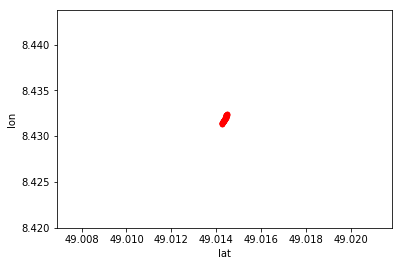

In [29]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
df_data.plot(kind='scatter',x='lat',y='lon',color='red')


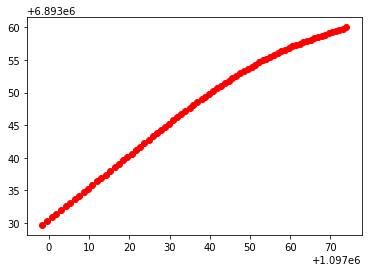

In [30]:
import matplotlib.pyplot as plt
import pyproj

wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
rgf93=pyproj.Proj("+init=EPSG:2154")
xx, yy = pyproj.transform(wgs84, rgf93, df_data['lon'].tolist(), df_data['lat'].tolist())

plt.scatter(xx,yy,color='red')

In [32]:
from pymongo import MongoClient 
 
# open connection
connection = MongoClient()
 
# get db
db = connection.study
 
# insert df into <table> of <dataframe>
db.ML201809.insert_many(df_data.to_dict('records'))
